In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix,f1_score,recall_score,precision_score, classification_report, roc_auc_score, roc_curve

In [120]:
df = pd.read_csv("/Users/anusrutamohanty/Desktop/Food_Delivery_Time_Prediction.csv")

In [121]:
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [122]:
df['Customer_Location'] = df['Customer_Location'].str.strip('()')
df[['Customer_Latitude', 'Customer_Longitude']] = df['Customer_Location'].str.split(',', expand=True)
df['Customer_Latitude'] = df['Customer_Latitude'].astype(float)
df['Customer_Longitude'] = df['Customer_Longitude'].astype(float)

df['Restaurant_Location'] = df['Restaurant_Location'].str.strip('()')
df[['Restaurant_Latitude', 'Restaurant_Longitude']] = df['Restaurant_Location'].str.split(',', expand=True)
df['Restaurant_Latitude'] = df['Restaurant_Latitude'].astype(float)
df['Restaurant_Longitude'] = df['Restaurant_Longitude'].astype(float)

In [123]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371 
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

df['Distance_km'] = haversine(df['Restaurant_Latitude'], df['Restaurant_Longitude'],
                              df['Customer_Latitude'], df['Customer_Longitude'])

In [124]:
le = LabelEncoder()
for col in ['Weather_Conditions', 'Traffic_Conditions', 'Vehicle_Type']:
    df[col] = le.fit_transform(df[col])

In [125]:
numeric_cols = ['Distance', 'Delivery_Time', 'Order_Cost','Tip_Amount'] 
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [126]:
median_time = df['Delivery_Time'].median()
df['Delivery_Status'] = (df['Delivery_Time'] > median_time).astype(int)

Gaussian Naive Bayes Results:
Accuracy: 0.9667
Precision: 0.9688
Recall: 0.9688
F1 Score: 0.9688

Confusion Matrix:
 [[27  1]
 [ 1 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.97      0.97      0.97        32

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



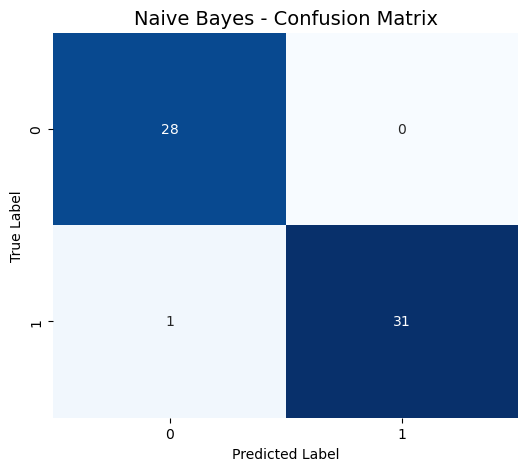

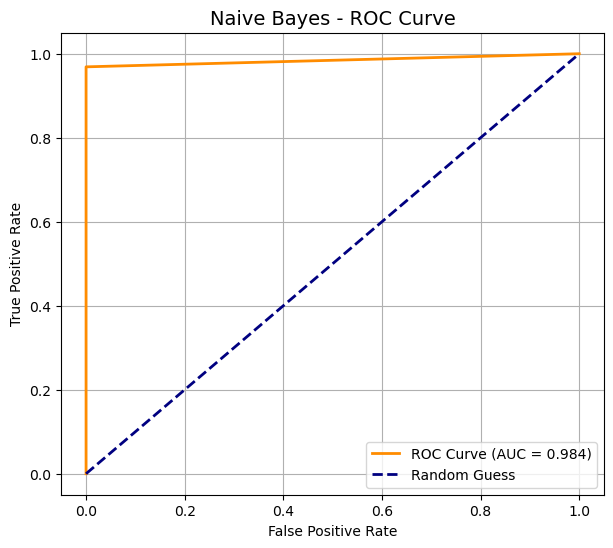

In [130]:
x = df[['Delivery_Time', 'Distance', 'Order_Cost',
        'Tip_Amount', 'Weather_Conditions', 'Traffic_Conditions',
        'Vehicle_Type']]
y = df['Delivery_Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

nb = GaussianNB()
nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Gaussian Naive Bayes Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Naive Bayes - Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# --- ROC Curve ---
# Get predicted probabilities (for positive class = 1)
y_prob_dt = best_dt.predict_proba(x_test)[:, 1]

# Compute ROC metrics
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)
roc_auc = roc_auc_score(y_test, y_prob_dt)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guess")
plt.title("Naive Bayes - ROC Curve", fontsize=14)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}

Decision Tree Classifier Results:
Accuracy: 0.983
Precision: 1.000
Recall: 0.969
F1 Score: 0.984

Confusion Matrix:
 [[28  0]
 [ 1 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.97      0.98        32

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



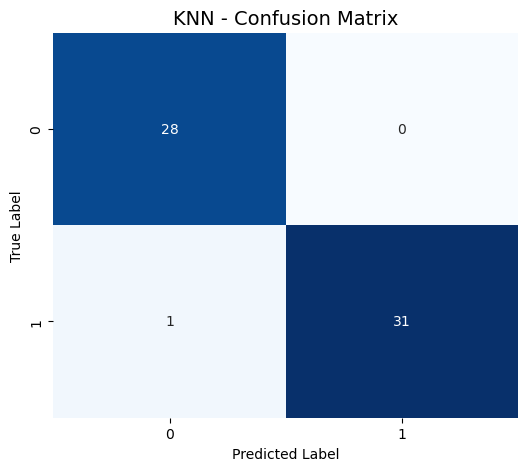

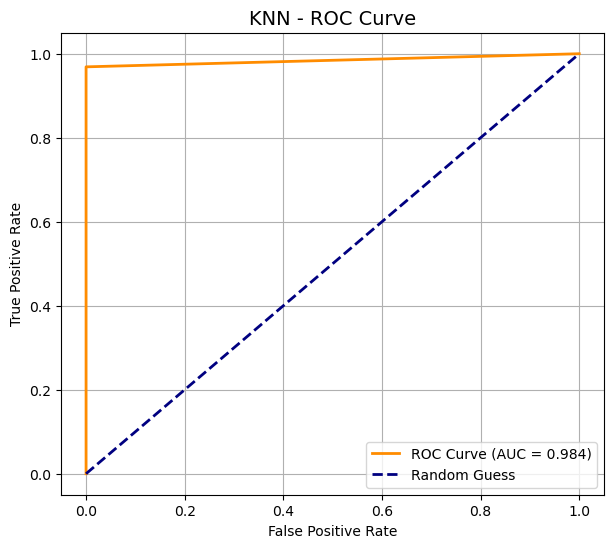

In [131]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': list(range(1, 21)),   
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan'] 
}

grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(x_train, y_train)

best_dt = grid_dt.best_estimator_
print("Best Decision Tree Parameters:", grid_dt.best_params_)

y_pred_dt = best_dt.predict(x_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print("\nDecision Tree Classifier Results:")
print(f"Accuracy: {accuracy_dt:.3f}")
print(f"Precision: {precision_dt:.3f}")
print(f"Recall: {recall_dt:.3f}")
print(f"F1 Score: {f1_dt:.3f}")

print("\nConfusion Matrix:\n", cm_dt)
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("KNN - Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# --- ROC Curve ---
# Get predicted probabilities (for positive class = 1)
y_prob_dt = best_dt.predict_proba(x_test)[:, 1]

# Compute ROC metrics
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)
roc_auc = roc_auc_score(y_test, y_prob_dt)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guess")
plt.title("KNN - ROC Curve", fontsize=14)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}

Decision Tree Classifier Results:
Accuracy: 0.983
Precision: 1.000
Recall: 0.969
F1 Score: 0.984

Confusion Matrix:
 [[28  0]
 [ 1 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.97      0.98        32

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



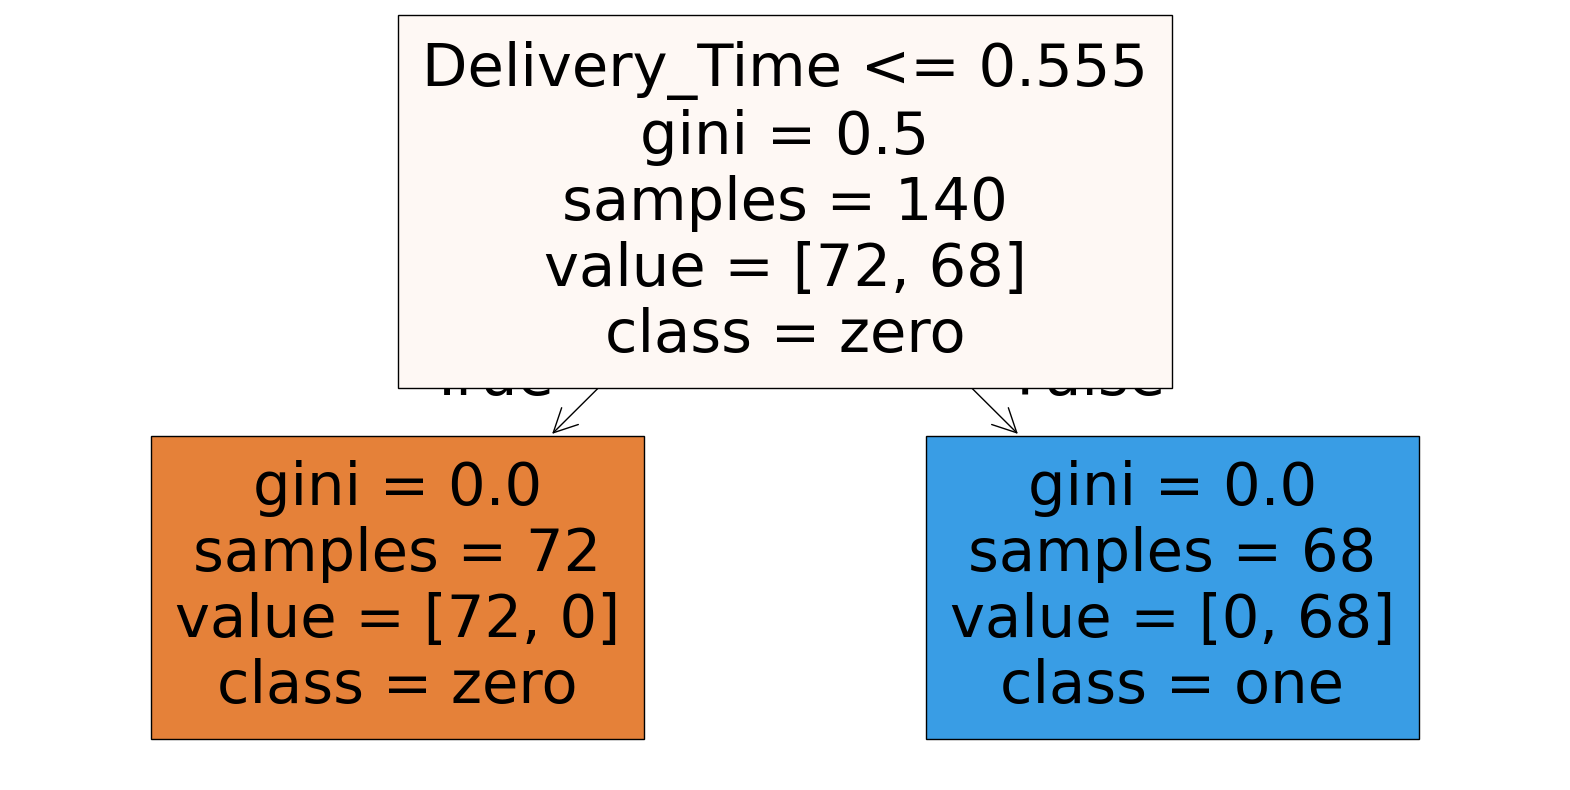

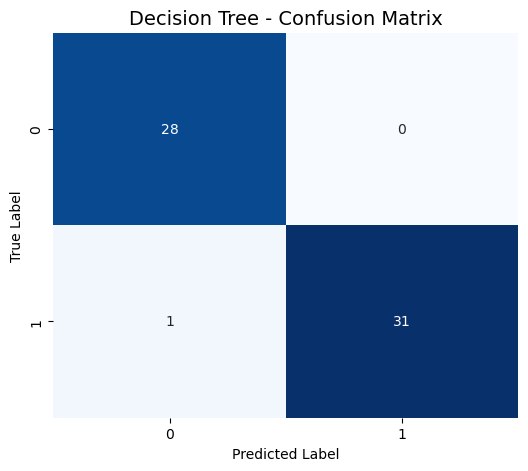

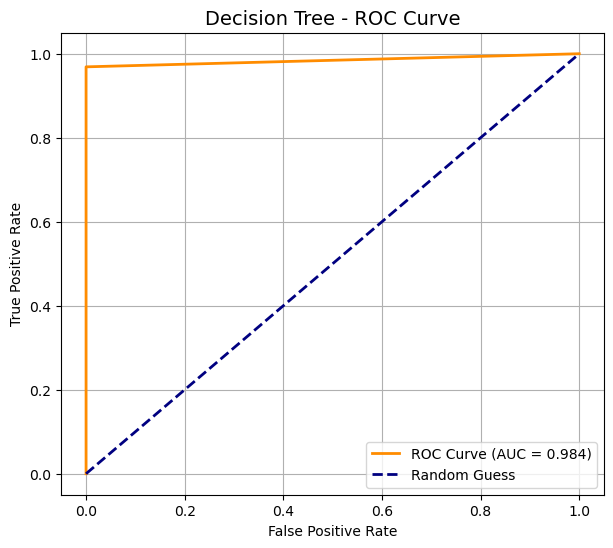

In [132]:
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {
    'max_depth': [2, 4, 6, 8, 10, 12, None],       
    'min_samples_split': [2, 5, 10, 20],            
    'criterion': ['gini', 'entropy', 'log_loss']    
}

grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(x_train, y_train)

best_dt = grid_dt.best_estimator_
print("Best Decision Tree Parameters:", grid_dt.best_params_)

y_pred_dt = best_dt.predict(x_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print("\nDecision Tree Classifier Results:")
print(f"Accuracy: {accuracy_dt:.3f}")
print(f"Precision: {precision_dt:.3f}")
print(f"Recall: {recall_dt:.3f}")
print(f"F1 Score: {f1_dt:.3f}")

print("\nConfusion Matrix:\n", cm_dt)
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

plt.figure(figsize=(20,10))
plot_tree(best_dt, feature_names=x.columns, class_names=['zero','one'], filled=True)
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Decision Tree - Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# --- ROC Curve ---
# Get predicted probabilities (for positive class = 1)
y_prob_dt = best_dt.predict_proba(x_test)[:, 1]

# Compute ROC metrics
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)
roc_auc = roc_auc_score(y_test, y_prob_dt)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Guess")
plt.title("Decision Tree - ROC Curve", fontsize=14)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()